# Final Project Report

I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name: Beatrice Spinola

CWID: 20012606

Date: 05/04/2023

1) Identify, define, and motivate the business problem you are addressing.

A telecommunication provider divides its customer base by service usage patterns and categorizes them into four groups (1 = Basic Service, 2 = E-Service, 3 = Plus Service, 4 = Total Service). As a consultant for the telecommunications provider, I will use demographic data to predict group membership. My goal is to address the accuracy of ad-targeted campaigns and improve customer retention.

2) How (precisely) will a data mining solution address the business problem?

By using demographic data to predict group membership, the company can customize offers for individual prospective customers, and run targeted ad campaigns. In other words, the data mining solution can aid the selection of those targeted customers who have a high likelihood of responding to a certain offer. Building models from the results of prior campaigns and utilizing those models to choose the target audience for future campaigns are two examples of how this data mining solution address business problem. Although this data mining technique will allow the telecommunication company to target potential customers more accurately, it won’t predict a customer's group membership with 100% accuracy.

3) Identify and describe the data (and data sources) that will support data mining to address the business problem. Include those aspects of the data that we routinely talk about in class and the homeworks.

The dataset teleCust1000t includes the following variables: 
region: (1 = East Coast, 2 = West Coast, 3 = South). 
Tenure: (months). 
Age: (year). 
Maritial: (1 = married, 0 = single).
Address: (months).
Income: (thousands of dollars).
Education: (1 = no highschool, 2 = highschool, 3 = college, 4 = graduate, 5 = phd).
Employ: (months).
Retire: (1 = retired, 0 = not retired).
Gender: (1 = male, 2 = female).
Reside: (years).
Custcat: (1 = Basic Service 2 = E-Service 3 = Plus Service 4 = Total Service).

In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

In [2]:
# Reading the csv file
df = pd.read_csv(r'C:\Users\beasp\Downloads\teleCust1000t.csv')

In [3]:
# Return the first five rows of the data
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
# Description of the data in the DataFrame
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


<AxesSubplot:xlabel='age', ylabel='Count'>

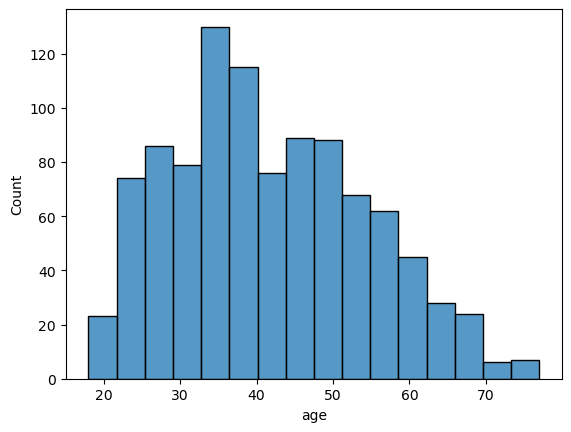

In [6]:
# Histogram for age column
sns.histplot(df['age'])

<AxesSubplot:xlabel='income', ylabel='Count'>

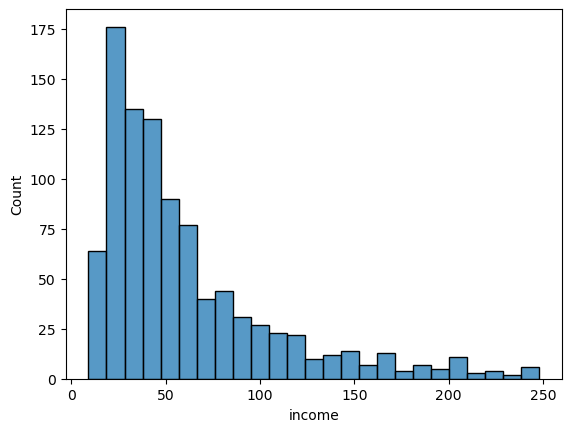

In [7]:
# Histogram of income
sns.histplot(df[df['income']<250]['income'])

The median income is 47 and the largest groups of customers are below median income. 

<AxesSubplot:xlabel='income', ylabel='Count'>

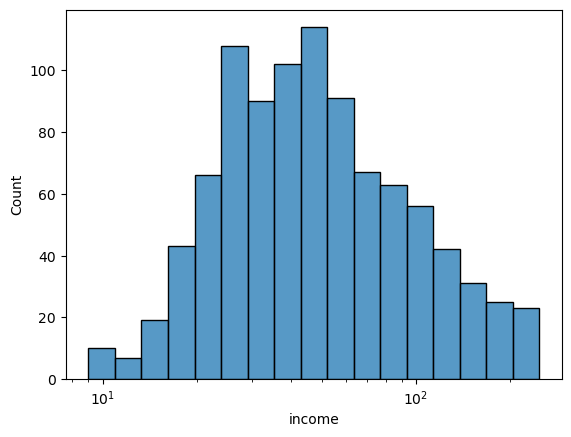

In [8]:
# Histogram of log scale of income
sns.histplot(df[df['income']<250]['income'], log_scale = True)

We assumed that most customers were below median income and by taking the log scale of the income, we confirm our assumption that most customers are below the median income. 

<AxesSubplot:xlabel='custcat', ylabel='Count'>

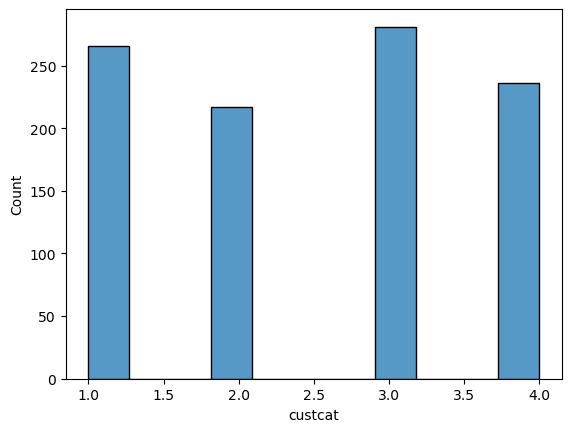

In [9]:
# Histogram of custcat (the four memberships types)
sns.histplot(df['custcat'])

4) Specify how these data are integrated to produce the format required for data mining. Select a group of features and a main forecast variable (discrete or continuous)

In [10]:
# Group columns based on custcat (the four group memberships) which is our main forecast variable
df.groupby('custcat').mean()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
custcat,,,,,,,,,,,
1,2.090226,24.676692,39.657895,0.417293,9.390977,54.759398,2.364662,8.484962,0.041353,0.507519,2.199248
2,1.963134,43.345622,41.788018,0.529954,12.571429,74.834101,2.958525,10.576037,0.032258,0.548387,2.336406
3,1.996441,40.078292,44.430605,0.494662,13.380783,89.032028,2.153025,14.309609,0.078292,0.505338,2.227758
4,2.029661,35.144068,40.601695,0.550847,10.868644,92.000000,3.368644,10.228814,0.029661,0.512712,2.597458


In [11]:
# Select a group of features
features = ['tenure', 'retire', 'marital', 'income', 'ed', 'employ', 'address']

5) Using cross-validation with 10 folds of the training dataset, calibrate the models selecting the optimal values for at least one parameter of each of the following algorithms:
• Splines (only if forecasting a continuous variable)
• Local linear regression (only if forecasting a continuous variable)
• Generalized additive models (only if forecasting a continuous variable)
• Decision trees
• Bagging
• Boosting
• Random forest
• Support vector machine
• Naïve Bayes or Bayes network (only if forecasting a discrete variable)
• Deep learning

In [12]:
models = {}

# Split the data into training and test datasets
train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)

# Define train_df_x
train_df_x = train_df[features]

# Define test_df_x
test_df_x = test_df[features]

In [13]:
# Standardize the dataset
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_df_x[features])

# Transform the training and test data
train_df_x = scaler.transform(train_df_x[features])
test_df_x = scaler.transform(test_df_x[features])

train_df_x

array([[-1.02026282, -0.21282896,  1.03046381, ..., -1.34303915,
        -0.57160493,  0.63289762],
       [-0.54722542, -0.21282896,  1.03046381, ..., -1.34303915,
         0.0428405 , -0.45122496],
       [ 0.16233067, -0.21282896,  1.03046381, ...,  1.12628717,
        -0.05956707, -0.05699857],
       ...,
       [-0.73644038, -0.21282896, -0.97043679, ...,  1.12628717,
         0.45247079, -0.94400795],
       [ 0.4461531 , -0.21282896,  1.03046381, ...,  1.94939594,
        -0.6740125 , -1.14112115],
       [-1.11487029, -0.21282896, -0.97043679, ..., -1.34303915,
        -1.08364278, -0.94400795]])

In [14]:
# Random Forest Classifier
rf = RandomForestClassifier()

gs = GridSearchCV(rf, {'n_estimators': [2, 3, 4], 'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4, 5, 8, 15]}, cv = 10)
gs.fit(train_df_x, train_df['custcat'])

rf = RandomForestClassifier(n_estimators = gs.best_params_['n_estimators'], max_depth = gs.best_params_['max_depth'], min_samples_leaf = gs.best_params_['min_samples_leaf'], random_state = 1)
rf.fit(train_df_x, train_df['custcat'])

pred = rf.predict(test_df[features])

#10-fold cross-validation for the training set
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
scores = cross_val_score(rf, test_df_x, test_df['custcat'], scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))

models["Random Forest Classifier"] = rf

# Print the number of accurately predicted observations
result_df = pd.DataFrame({'pred': pred, 'actual': test_df['custcat']})
(result_df['pred'] == result_df['actual']).sum()

Degree 10, MSE: 2.255, STD: 0.45563142999578066


C:\Users\beasp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


85

In [15]:
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(train_df_x, train_df['custcat'])
pred = gb.predict(test_df[features])

#10-fold cross-validation for the training set
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

scores = cross_val_score(rf, test_df_x, test_df['custcat'], scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))

models["Naïve Bayes"] = gb

# Print the number of accurately predicted observations
result_df = pd.DataFrame({'pred': pred, 'actual': test_df['custcat']})
(result_df['pred'] == result_df['actual']).sum()

Degree 10, MSE: 2.255, STD: 0.45563142999578066


C:\Users\beasp\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


98

In [16]:
# Support Vector Machine
from sklearn.svm import SVC

#10-fold cross-validation for the training set
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernels:
    svc = SVC(kernel=i, probability=True)

    # Let's tell the model what is the data
    model = svc.fit(train_df_x, train_df['custcat'])
    svc.score(train_df_x, train_df['custcat'])
    scores = cross_val_score(model, test_df_x, test_df['custcat'], scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))
    
models["Support Vector Machine"] = model

Degree 10, MSE: 2.2025, STD: 0.29737392286479997
Degree 10, MSE: 2.38, STD: 0.4891063279083599
Degree 10, MSE: 2.1725, STD: 0.38833780397998857
Degree 10, MSE: 2.3125, STD: 0.3260080520477984


In [17]:
svc = models["Support Vector Machine"]
pred = svc.predict(test_df_x)

# Print the number of accurately predicted observations
result_df = pd.DataFrame({'pred': pred, 'actual': test_df['custcat']})
(result_df['pred'] == result_df['actual']).sum()

135

In [18]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier

#10-fold cross-validation for the training set
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1,4):
    G_Boost = GradientBoostingClassifier(max_depth=i)

    # Let's tell the model what is the data
    model = G_Boost.fit(train_df_x, train_df['custcat'])
    G_Boost.score(train_df_x, train_df['custcat'])
    scores = cross_val_score(model, test_df_x, test_df['custcat'], scoring="neg_mean_squared_error", cv=crossvalidation,n_jobs=1)
    print("Degree " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " +str(np.std(scores)))

models["Gradient Boost"] = model

Degree 10, MSE: 2.36, STD: 0.528937614468852
Degree 10, MSE: 2.2475, STD: 0.5071304072918523
Degree 10, MSE: 2.2325000000000004, STD: 0.5054762605701677


In [19]:
G_Boost = models["Gradient Boost"]
pred = svc.predict(test_df_x)

# Print the number of accurately predicted observations
result_df = pd.DataFrame({'pred': pred, 'actual': test_df['custcat']})
(result_df['pred'] == result_df['actual']).sum()

135

6) Build a table with the root mean squared error for a regression problem and the Matthews correlation coefficient and test error for a classification problem.

In [20]:
# Build a table with Matthews Correlation Coefficient and Test Error
models

{'Random Forest Classifier': RandomForestClassifier(max_depth=3, n_estimators=3, random_state=1),
 'Naïve Bayes': GaussianNB(),
 'Support Vector Machine': SVC(kernel='sigmoid', probability=True),
 'Gradient Boost': GradientBoostingClassifier()}

In [21]:
# Import necessary libraries
from sklearn.metrics import matthews_corrcoef, accuracy_score

# Define empty dictionaries to store results
mcc_results = {}
test_error = {}

# Evaluate Matthews Correlation Coefficient, and test error for each model
for model_name, model in models.items():
    # Predict on test set
    y_pred = model.predict(test_df_x)
    y_prob = model.predict_proba(test_df_x)
    
    # Calculate Matthews Correlation Coefficient
    mcc = matthews_corrcoef(test_df['custcat'], np.round(y_pred))
    mcc_results[model_name] = mcc
    
    # Calculate test error
    error = 1 - accuracy_score(test_df['custcat'], np.round(y_pred))
    test_error[model_name] = error
    
# Print results
performance = pd.DataFrame({'MCC': mcc_results, 'Test Error': test_error})
print(performance)

                               MCC  Test Error
Random Forest Classifier  0.206272      0.5950
Naïve Bayes               0.153850      0.6375
Support Vector Machine    0.109471      0.6625
Gradient Boost            0.110437      0.6675


7) Discuss choices for data mining algorithm: what are the pros and cons of each algorithm?

Random Forest Classifier worked well with my data because it utilizes randomization to avoid overfitting, runs well even without hyperparameters, can handle large datasets efficiently, provides better accuracy than other classification algorithms, and produces good predictions that can be understood easily. The Random Forest Classifier’s weakness is that it is found to be biased while dealing with categorical variables (which are present in our dataset) and can take time to process data, compared to Decision Trees and other models. 

Naïve Bayes is good as a baseline because it produces results based on the assumption that all parameters are independent, avoids overfitting, and it’s a very fast algorithm compared to other more complicated algorithms. The cons of Naïve Bayes are that it doesn't combine features for over-predictive power, and the assumption that all features are independent is not usually the case in real life, so Naïve Bayes is less accurate than other complicated algorithms. Essentially, its speed comes at a cost (lower accuracy).

The benefits of using Support Vector Machine (SVM) are that it works relatively well when there is a clear margin of separation between classes, and it is relatively memory efficient. The disadvantages of the Support Vector Machine are that it isn't great for large datasets like ours, does not perform very well when the data set has more noise (there is a lot of overlap between features), and underperforms in cases where the number of features for each data point exceeds the number of training data samples.

Gradient Boost’s advantages are that it is generally more accurate compared to other modes, trains faster, especially on larger datasets like ours, most provide support handling categorical features, and some handle missing values natively. The disadvantages of Gradient Boost are that it can overfit when there is too much noise in the data, which is present in our data, models can be computationally expensive and take a long time to train, and it can be hard to interpret the final models.

8) Justify the final selection of the main algorithm for this project. You should consider the performance table and why and how this model should “solve” the business problem (i.e., improve along some dimension of interest to the firm). An algorithm may have an excellent performance score; however, it does not provide enough information to solve your problem. In that case, you may select the algorithm that may not have the highest performance score, although it brings some relevant information to find the best solution.

The performance table computed above, reports the Matthews Correlation Coefficient and the Test Error for all four data mining algorithms (Random Forest Classifier, Naïve Bayes, Support Vector Machine, and Gradient Boost). 

Consider that a Matthews Correlation Coefficient, C = 1 indicates perfect agreement between prediction and observation, C = 0 is expected for a prediction no better than random, and C = -1 indicates total disagreement between prediction and observation. And, calculating any form of error rate for a predictive model is called model validation. To validate our models, we calculated the Test Error, which represents the number of incorrectly classified objects divided by the total number of objects. 

Therefore, I selected the Random Forest Classifier as the final selection of the main algorithm for this project because it has the highest Matthews Correlation Coefficient (C = 0.206272) and the lowest Test Error (ε = 0.5950) out of all the algorithms. Compared to the Naïve Bayes algorithm, the Random Forest Classifier had a Matthews Correlation Coefficient that was 5.24% higher and a Test Error that was 4.25% lower than the baseline. 

A Matthews Correlation Coefficient equal to 0.206272, indicates that the prediction is better than random but not all predictions matched the observations. Furthermore, a Test Error of 0.5950 suggests that 40.50% of the observations were predicted correctly, or 59.50% of the observations were predicted incorrectly. 

Therefore, if the telecommunication provider adopted the Random Forest Classifier to predict group membership, they could expect the predictions to be roughly 40.50% correct.

9) Discuss how the result of the data mining is/should be evaluated. How should a business case be developed to project expected improvement? ROI? If this is impossible/difficult, explain why and identify viable alternatives.

To evaluate the result of the data mining, the telecommunication company should utilize the analysis to run targeted ad campaigns utilizing the findings of the model, and track customer retention among those customers that signed up in response to the ad campaign. The business should compare customer retention to the average and median customer retention and the customer retention among correctly labeled users, to project expected improvement. In our business problem, we can’t exactly get ROI, but we can get an estimate. 

What our results find is that the telecommunication company could effectively target 40.50% of its audience. Additionally, the sales team of the telecommunication company could use our analysis to predict customer needs and consequently improve customer retention. The reason why we can’t accurately predict ROI for this business solution is that we don’t have any sales data or any monetary data on the telecommunication company.

10) Discuss how the result of the data mining will be deployed.

The telecommunication company should deploy the data mining by running targeted ad campaigns and tracking customers that signed up in response to ad-campaigns. 
To monitor and maintain the data mining model results the telecommunication company should add another column to track customer response to the target add-campaigns. 
After this specified period, the business should analyze the results of customers acquired by the ad-campaigns for the purposes of improving customer retention.

11) Discuss any issues the firm should be aware of regarding deployment.

The telecommunication company’s only concern regarding deployment would be the accuracy of the demographic data utilized in ad campaigns.

12) Are there critical ethical considerations?

Although targeted advertising is actually advantageous, most consumers frequently have a limited understanding of it. It is opaque, misleading, and sometimes does not even provide the consumer with a viable way to opt out. So, yes there are some ethical considerations if a company is using its customer’s demographic data to target them into potentially more expensive plans that they might not need.

Companies who plan to use these technologies must follow some guidelines to ensure targeted advertising ethics. Some inherent moral duties of companies are not to be deceitful, be actively transparency (companies take reasonable action to ensure customers understand all the information they are presented with), give customers comprehensive control over their data, set precautions in place to prevent sensitive data leaks or misuse, and treat all parties that are affected by their actions fairly.

13) Identify the risks associated with your proposed plan and how you would mitigate them.

The risks associated with my proposed plan would be that the telecommunication company fails to accurately target the expected 40.50% of its audience. If the business solution failed, the company would incur unnecessary advertising costs and retain fewer customers. To mitigate this risk, the telecommunication company should first verify the accuracy and relevance of its demographic data, before running its ad-targeted campaigns.